# EQUITY VANILLA OPTION USING MONTE CARLO PLUS TIMINGS

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
from financepy.utils import *
from financepy.products.equity import EquityVanillaOption
from financepy.market.curves.discount_curve_flat import *
from financepy.models.black_scholes import *

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Define the Call and Put Options

In [3]:
value_dt = Date(1, 4, 2016)

In [4]:
expiry_dt = Date(1, 6, 2018)

In [5]:
expiry_dt

01-JUN-2018

In [6]:
strike_price = 100.0

In [7]:
call_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_CALL)

In [8]:
stock_price = 100.0
volatility = 0.20
interest_rate = 0.05
dividend_yield = 0.03

In [9]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [10]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [11]:
model = BlackScholes(volatility)

In [12]:
v = call_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)
print(v)

12.835742346433916


In [13]:
v_exact = [v] * 10

# Timing Analysis

In [14]:
seed = 141

In [15]:
num_paths_list = np.arange(1,11,1) * 10000

## No Numpy Vectorisation and No NUMBA

In [16]:
v_mc_NO_NUMPY = []
timings_NO_NUMPY = []

for num_paths in num_paths_list:
    start = time()
    v = call_option.value_mc_nonumba_nonumpy(value_dt, stock_price, discount_curve,
                           dividend_curve, model, num_paths, seed, use_sobol=False)
    end = time()
    elapsed = end - start
    timings_NO_NUMPY.append(elapsed)
    v_mc_NO_NUMPY.append(v)

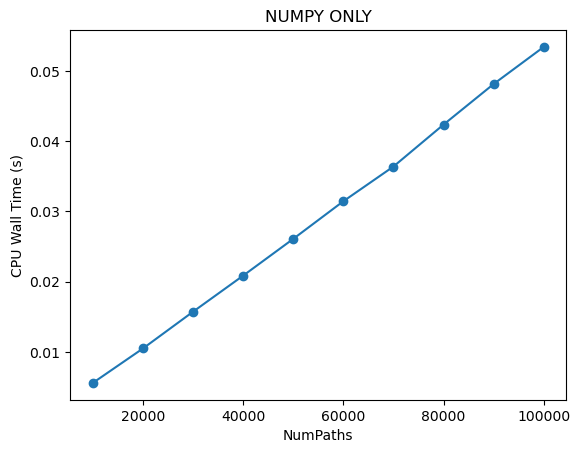

In [17]:
plt.plot(num_paths_list, timings_NO_NUMPY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY ONLY");

## Standard Monte Carlo using Numpy

In [18]:
num_paths_list = np.arange(1,11,1) * 1000000

In [19]:
v_mc_NUMPY_ONLY = []
timings_NUMPY_ONLY = []

for num_paths in num_paths_list:
    start = time()
    v = call_option.value_mc_numpy_only(value_dt, stock_price, discount_curve,
                           dividend_curve, model, num_paths, seed, use_sobol=False)
    end = time()
    elapsed = end - start
    timings_NUMPY_ONLY.append(elapsed)
    v_mc_NUMPY_ONLY.append(v)

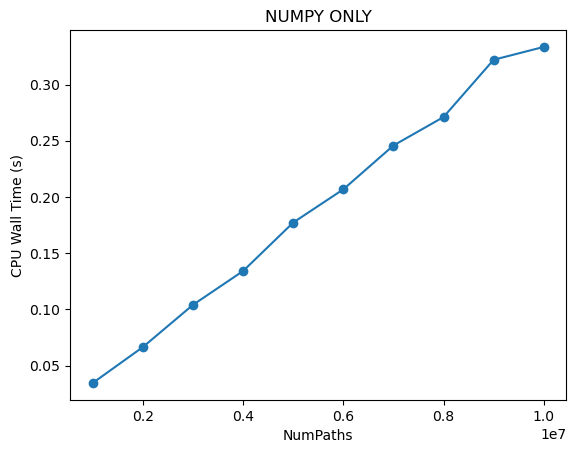

In [20]:
plt.plot(num_paths_list, timings_NUMPY_ONLY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY ONLY");

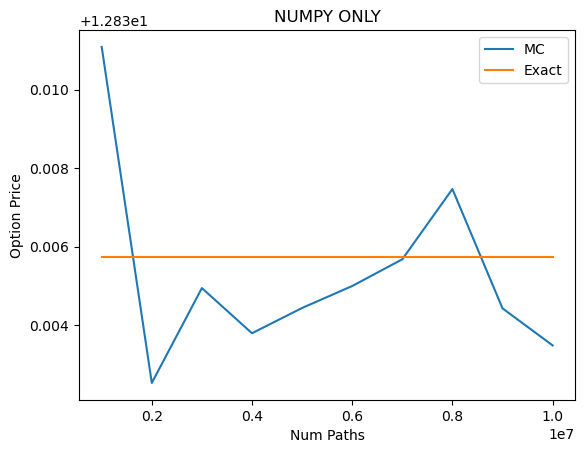

In [21]:
plt.title("NUMPY ONLY")
plt.plot(num_paths_list, v_mc_NUMPY_ONLY, label="MC")
plt.plot(num_paths_list, v_exact, label="Exact")
plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend();

## Standard Monte Carlo using Numpy and Numba

In [22]:
v_mc_NUMPY_NUMBA = []
timings_NUMPY_NUMBA = []

for num_paths in num_paths_list:
    start = time()
    v = call_option.value_mc_numba_only(value_dt, stock_price, discount_curve,
                           dividend_curve, model, num_paths, seed)
    end = time()
    elapsed = end - start
    timings_NUMPY_NUMBA.append(elapsed)
    v_mc_NUMPY_NUMBA.append(v)

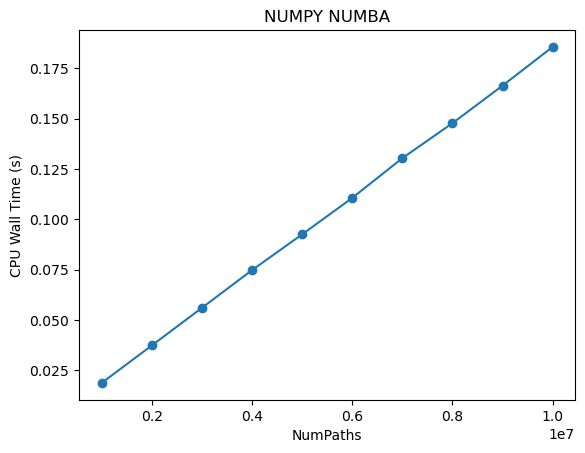

In [23]:
plt.plot(num_paths_list, timings_NUMPY_NUMBA, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY NUMBA");

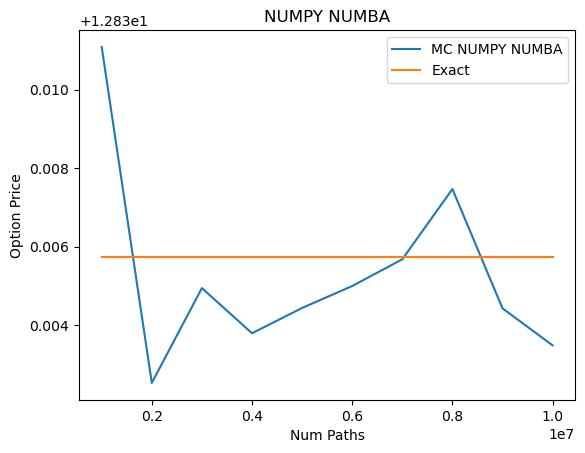

In [24]:
plt.title("NUMPY NUMBA")
plt.plot(num_paths_list, v_mc_NUMPY_NUMBA, label="MC NUMPY NUMBA")
plt.plot(num_paths_list, v_exact, label="Exact")
plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend();

## Using Sobol Quasi-Random Numbers

In [25]:
v_mc_SOBOL_NUMPY = []
timings_SOBOL_NUMPY = []

for num_paths in num_paths_list:
    start = time()
    v = call_option.value_mc(value_dt, stock_price, discount_curve,
                           dividend_curve, model, num_paths, seed, use_sobol=True)
    end = time()
    elapsed = end - start
    timings_SOBOL_NUMPY.append(elapsed)
    v_mc_SOBOL_NUMPY.append(v)

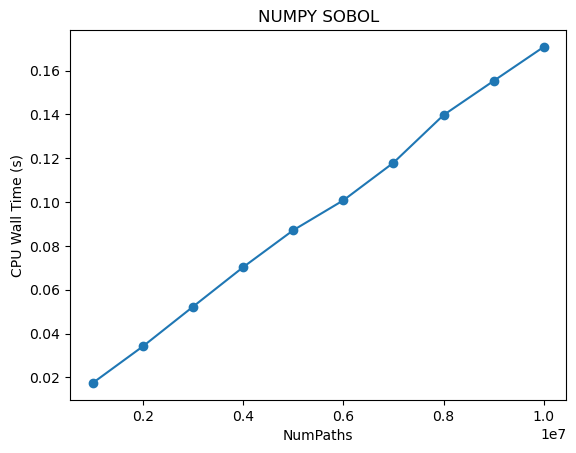

In [26]:
plt.plot(num_paths_list, timings_SOBOL_NUMPY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY SOBOL");

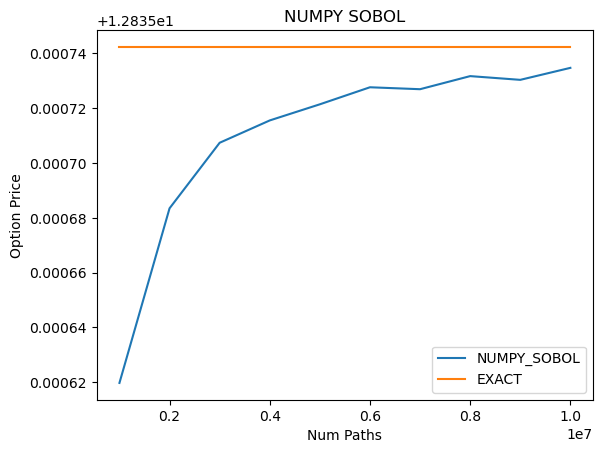

In [27]:
plt.title("NUMPY SOBOL")
plt.plot(num_paths_list, v_mc_SOBOL_NUMPY, label="NUMPY_SOBOL")
plt.plot(num_paths_list, v_exact, label="EXACT")

plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend()

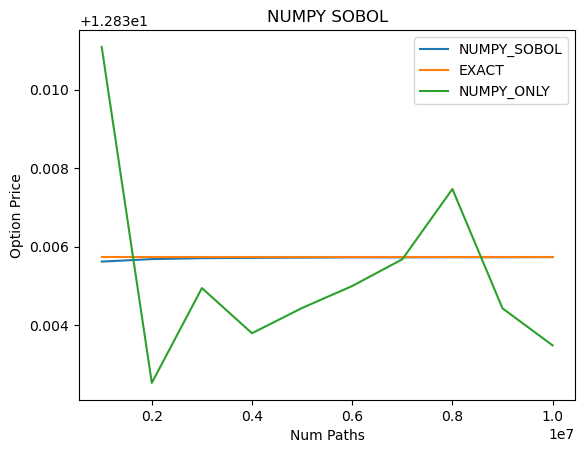

In [28]:
plt.title("NUMPY SOBOL")
plt.plot(num_paths_list, v_mc_SOBOL_NUMPY, label="NUMPY_SOBOL")
plt.plot(num_paths_list, v_exact, label="EXACT")
plt.plot(num_paths_list, v_mc_NUMPY_ONLY, label="NUMPY_ONLY")

plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend()

## Summary

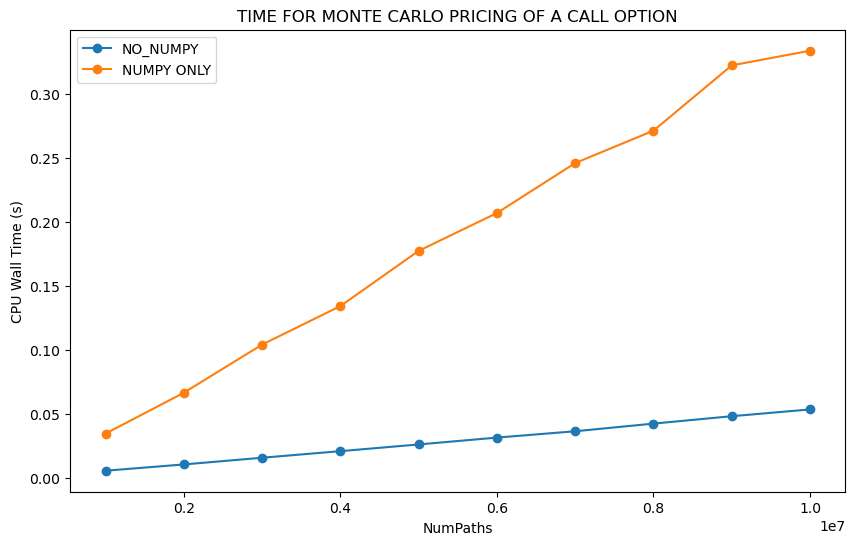

In [29]:
timings_CPP = [0.041, 0.11, 0.156, 0.203, 0.25, 0.309, 0.366, 0.398, 0.454, 0.484]
plt.figure(figsize=(10,6))
plt.plot(num_paths_list, timings_NO_NUMPY, 'o-', label="NO_NUMPY")
plt.plot(num_paths_list, timings_NUMPY_ONLY, 'o-', label="NUMPY ONLY")
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("TIME FOR MONTE CARLO PRICING OF A CALL OPTION")
plt.legend()
#plt.yscale('log')

In [30]:
timings_NO_NUMPY

[0.005589008331298828,
 0.010491371154785156,
 0.015725135803222656,
 0.020861148834228516,
 0.02609562873840332,
 0.03145265579223633,
 0.03639626502990723,
 0.042368412017822266,
 0.04814553260803223,
 0.053429365158081055]

In [31]:
timings_NUMPY_ONLY

[0.034529685974121094,
 0.06645679473876953,
 0.10402321815490723,
 0.13409852981567383,
 0.17719364166259766,
 0.20674467086791992,
 0.24573183059692383,
 0.27105093002319336,
 0.3220090866088867,
 0.3334355354309082]

In [32]:
41.48/0.578

71.76470588235294

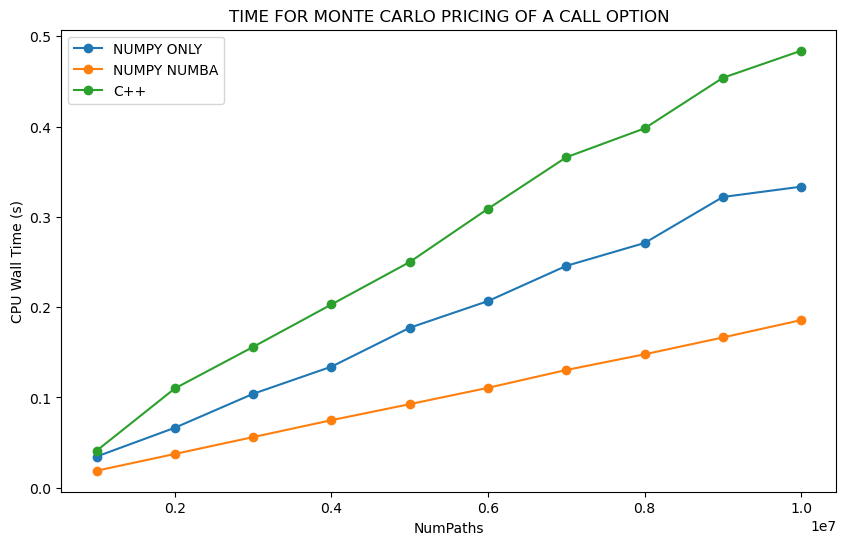

In [33]:
timings_CPP = [0.041, 0.11, 0.156, 0.203, 0.25, 0.309, 0.366, 0.398, 0.454, 0.484]
plt.figure(figsize=(10,6))
plt.plot(num_paths_list, timings_NUMPY_ONLY, 'o-', label="NUMPY ONLY")
plt.plot(num_paths_list, timings_NUMPY_NUMBA, 'o-', label="NUMPY NUMBA")
plt.plot(num_paths_list, timings_CPP, 'o-', label="C++")
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("TIME FOR MONTE CARLO PRICING OF A CALL OPTION")
plt.legend()
#plt.yscale('log')

The convergence is impressive !

Copyright (c) 2020 Dominic O'Kane